# Digital Image Processing - Assignment 7
#### By Sravanth Chowdary Potluri CS20B1006
ASSIGNMENT 7:

Problem statement:
1. Swap phase of the dog image and magnitude of the Lena image and display the output.
2. Swap phase of the Lena image and magnitude of the dog image and display the output
Solve 1 & 2 using built-in function (4 marks) and user defined function (6 marks).

Note:
a. Write a function to implement FFT for 1D signal.
b. Implement DFT function for an image using the “FFT for 1D” signal( derived in a)
c. Consider the images of Lena and dog images attached. Find phase and magnitude of
the dog and Lena images using the DFT function (in b).

In [187]:
# importing the required modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

# Using User defined functions

In [188]:
# function to compute the 1D FFT
def fft_1d(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft_1d(x[::2])
    odd = fft_1d(x[1::2])
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

In [189]:
# function to get the 2D FFT
def fft_2d(x):
    fft_rows = np.array([fft_1d(row) for row in x])
    fft_cols = np.array([fft_1d(col) for col in fft_rows.T]).T
    return fft_cols

In [190]:
# function to compute inverse 1D FFT
def ifft_1d(x):
    N = len(x)
    if N <= 1:
        return x
    even = ifft_1d(x[::2])
    odd = ifft_1d(x[1::2])
    T = [np.exp(2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

In [191]:
# function to compute inverse 2D FFT
def ifft_2d(x):
    ifft_rows = np.array([ifft_1d(row) for row in x])
    ifft_cols = np.array([ifft_1d(col) for col in ifft_rows.T]).T
    return ifft_cols

In [192]:
# importing the images
lena = cv2.imread('Lena.png',0)
dog = cv2.imread('dog.jpg',0)

In [193]:
lena.shape

(100, 100)

In [194]:
dog.shape

(100, 100)

In [195]:
# resizing the images to 128x128
lena = cv2.resize(lena,(128,128))
dog = cv2.resize(dog,(128,128))

In [196]:
# transforming the images to frequency domain
lena_fft = fft_2d(lena)
dog_fft = fft_2d(dog)

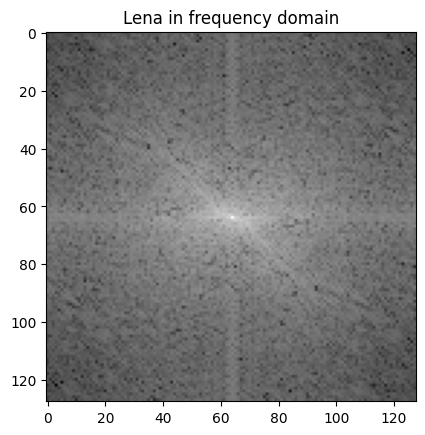

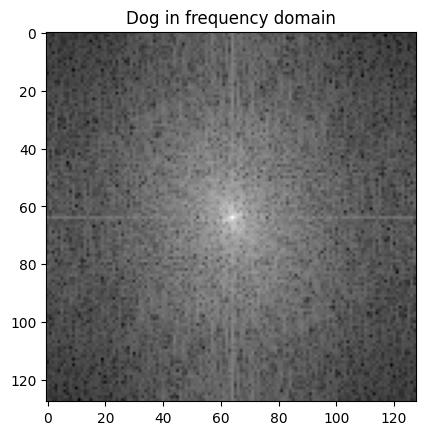

In [197]:
# shifting the quadrants of the images and displaying them in frequency domain
plt.imshow(np.log(np.abs(np.fft.fftshift(lena_fft))),cmap='gray')
plt.title('Lena in frequency domain')
plt.show()
plt.imshow(np.log(np.abs(np.fft.fftshift(dog_fft))),cmap='gray')
plt.title('Dog in frequency domain')
plt.show()

In [198]:
# computing the phase and magnitude of the images
lena_phase = np.angle(lena_fft)
lena_mag = np.abs(lena_fft)
dog_phase = np.angle(dog_fft)
dog_mag = np.abs(dog_fft)

In [199]:
# swapping the phase and magnitude of the images
lena_swapped = lena_mag*np.exp(1j*dog_phase)
dog_swapped = dog_mag*np.exp(1j*lena_phase)

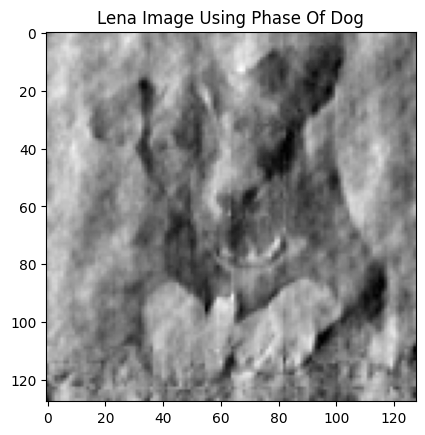

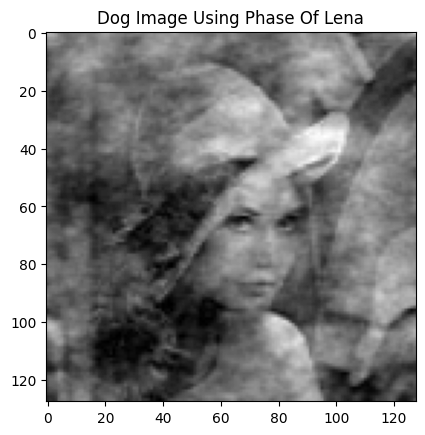

In [200]:
# displaying the swapped images in spatial domain by taking inverse fft
plt.imshow(np.abs(ifft_2d(lena_swapped)),cmap='gray')
plt.title('Lena Image Using Phase Of Dog')
plt.show()
plt.imshow(np.abs(ifft_2d(dog_swapped)),cmap='gray')
plt.title('Dog Image Using Phase Of Lena')
plt.show()

# Using INBUILT FUNCTIONS

In [201]:
# finding the fft of the images with numpy
lena_fft_np = np.fft.fft2(lena)
dog_fft_np = np.fft.fft2(dog)

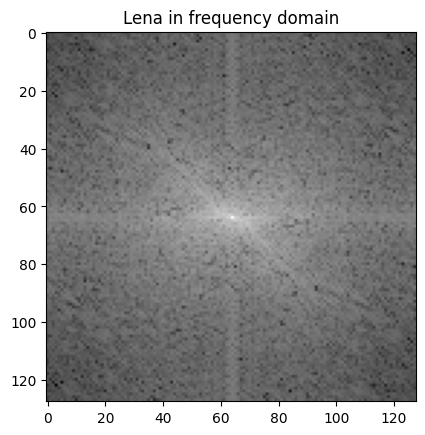

Text(0.5, 1.0, 'Dog in frequency domain')

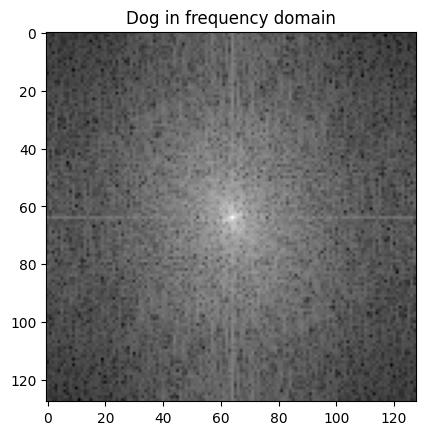

In [202]:
# displaying images in frequency domain by shifting quadrant
plt.imshow(np.log(np.abs(np.fft.fftshift(lena_fft_np))),cmap='gray')
plt.title('Lena in frequency domain')
plt.show()
plt.imshow(np.log(np.abs(np.fft.fftshift(dog_fft_np))),cmap='gray')
plt.title('Dog in frequency domain')

In [203]:
# computing the phase and magnitude of the images
lena_phase_np = np.angle(lena_fft_np)
lena_mag_np = np.abs(lena_fft_np)
dog_phase_np = np.angle(dog_fft_np)
dog_mag_np = np.abs(dog_fft_np)

In [204]:
# swapping the phase and magnitude of the images
lena_swapped = lena_mag_np*np.exp(1j*dog_phase_np)
dog_swapped = dog_mag_np*np.exp(1j*lena_phase_np)

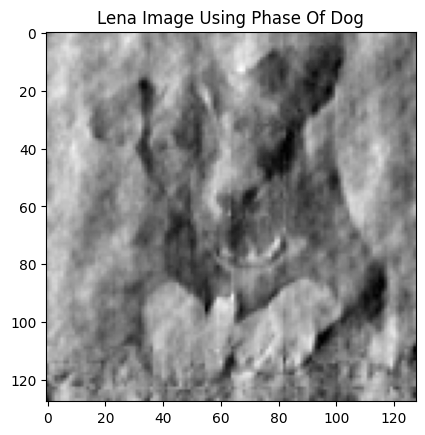

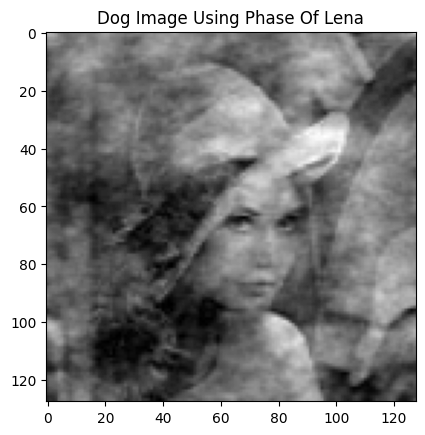

In [205]:
# displaying the swapped images in spatial domain by taking inverse fft
plt.imshow(np.abs(np.fft.ifft2(lena_swapped)),cmap='gray')
plt.title('Lena Image Using Phase Of Dog')
plt.show()
plt.imshow(np.abs(np.fft.ifft2(dog_swapped)),cmap='gray')
plt.title('Dog Image Using Phase Of Lena')
plt.show()